<a href="https://colab.research.google.com/github/morgwork/Distantly-Reading-IPCC-Reports/blob/main/IPCCM6_(4_17).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This codebook cleans and analyzes the draft of the sixt IPCC Working Group III report published in 2022. The  PDF is 2,913 pages, and a permanent link is available [here](https://www.ipcc.ch/report/ar6/wg3/) as the "Full Report." I converted the PDF into a TXT file with ABBY Fine Reader 14.**


## Cleaning
In this section, I clean the files for analysis. 

In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [2]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords

In [3]:
import string

all_punctuation = string.punctuation

print(f"All punctuation: {all_punctuation}")

All punctuation: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [4]:
# Remove stopwords function.

def remove_Stopwords(text):
    stop_words = set(stopwords.words('english')) 
    words = word_tokenize( text.lower() ) 
    sentence = [w for w in words if not w in stop_words]
    return " ".join(sentence)

# Lemmatize function.    
def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer() 
    sentences=sent_tokenize(text)
    for sentence in sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    return ' '.join(wordlist) 

# Cleaning text function.
def clean_text(text): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr]) 
    
    return text2.lower()


In [6]:
with open("/content/IPCC6M.txt", "r", encoding='utf-8') as text:
    IPCCM6 = text.read()

In [7]:
MC1=IPCCM6.lower() # remove casing
MC2=MC1
print(MC2[:500])

﻿ipcc
intergovernmental panel on cllffldto olldago
climate change 2022
mitigation of climate change
summary for policymakers
working group iii contribution to the sixth assessment report of the intergovernmental panel on climate change
wmo unep
approved
summary for policymakers
ipcc ar6 wg iii
working group iii contribution to the ipcc sixth assessment report (ar6)
summary for policymakers
drafting authors:
jim skea (united kingdom), priyadarshi r shukla (india), andy reisinger (new zealand), ra


In [8]:
for p in all_punctuation:

  MC3=MC2.replace(p,'')

In [9]:
MC4=remove_Stopwords(MC3)

In [10]:
MC5=lemmatize_text(MC4)

In [11]:
MC6=clean_text(MC5)

## Analysis
In this section, I will analyze the cleaned files with some basic word counts to highlight significant terms. I will also create a few WordCloud visualizations for each report, one with all collocates true and two or three that remove disproportionately represented terms and bigrams.

In [13]:
IPCCM6words= MC6.split()
print('Number of words in IPCCM3:',len(IPCCM6words))

Number of words in IPCCM3: 1211940


In [14]:
import time
time.sleep(5) 

In [19]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopword = stopwords.words("english")
time.sleep(5) 

word_tokens = nltk.word_tokenize(MC6)
MC7= [word for word in word_tokens if word not in stopword]
time.sleep(5) # this does not crash, but it will not print. may be more useful with even larger files. 


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
MC8= [word for word in MC7 if word.isalnum()] 

In [22]:
MC9=[x for x in MC8 if not (x.isdigit() 
                            or x[0] == '-' and x[1:].isdigit())] # good for eliminating numbers

In [23]:
print(MC9[:100])

['intergovernmental', 'panel', 'cllffldto', 'olldago', 'climate', 'change', 'mitigation', 'climate', 'change', 'summary', 'policymakers', 'working', 'group', 'iii', 'contribution', 'sixth', 'assessment', 'report', 'intergovernmental', 'panel', 'climate', 'change', 'wmo', 'unep', 'approved', 'summary', 'policymakers', 'ipcc', 'ar6', 'wg', 'iii', 'working', 'group', 'iii', 'contribution', 'ipcc', 'sixth', 'assessment', 'report', 'ar6', 'summary', 'policymakers', 'drafting', 'author', 'jim', 'skea', 'united', 'kingdom', 'priyadarshi', 'r', 'shukla', 'india', 'andy', 'reisinger', 'new', 'zealand', 'raphael', 'slade', 'united', 'kingdom', 'minal', 'pathak', 'india', 'alaa', 'al', 'khourdajie', 'united', 'kingdomsyria', 'renee', 'van', 'diemen', 'netherlandsunited', 'kingdom', 'amjad', 'abdulla', 'maldives', 'keigo', 'akimoto', 'japan', 'mustafa', 'babiker', 'sudansaudi', 'arabia', 'quan', 'bai', 'china', 'igor', 'bashmakov', 'russian', 'federation', 'christopher', 'bataille', 'canada', 'gor

In [24]:
from nltk import FreqDist
freq = FreqDist(MC9)
print(freq.most_common(100))

[('al', 18238), ('et', 18204), ('energy', 11912), ('emission', 9907), ('climate', 9325), ('policy', 7603), ('j', 6837), ('change', 6427), ('mitigation', 6279), ('http', 5432), ('carbon', 4805), ('chapter', 4695), ('global', 4660), ('development', 3763), ('total', 3702), ('ipcc', 3693), ('system', 3587), ('government', 3546), ('country', 3502), ('technology', 3424), ('ar6', 3266), ('c', 3229), ('final', 3120), ('impact', 2953), ('page', 2948), ('sector', 2932), ('distribute', 2854), ('cite', 2850), ('quote', 2847), ('distribution', 2828), ('r', 2806), ('wgiii', 2805), ('potential', 2700), ('high', 2653), ('scenario', 2626), ('cost', 2573), ('urban', 2563), ('also', 2495), ('use', 2495), ('pathway', 2477), ('environ', 2452), ('p', 2450), ('co2', 2389), ('building', 2358), ('transition', 2334), ('ghg', 2304), ('sustainable', 2258), ('fuel', 2223), ('l', 2222), ('b', 2178), ('pp', 2165), ('e', 2098), ('k', 2085), ('land', 2025), ('reduction', 2024), ('level', 2021), ('agreement', 1998), ('

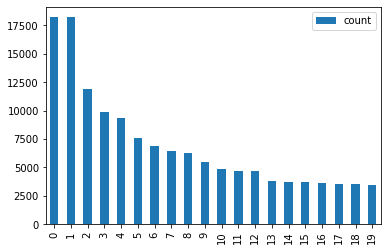

In [25]:
import pandas as pd

df = pd.DataFrame(list(freq.most_common(20)))
df.columns =['word', 'count']
df.plot(kind='bar');

In [26]:
print(df)

           word  count
0            al  18238
1            et  18204
2        energy  11912
3      emission   9907
4       climate   9325
5        policy   7603
6             j   6837
7        change   6427
8    mitigation   6279
9          http   5432
10       carbon   4805
11      chapter   4695
12       global   4660
13  development   3763
14        total   3702
15         ipcc   3693
16       system   3587
17   government   3546
18      country   3502
19   technology   3424


In [27]:
MC10=','.join(MC9)
import pandas as pd
df=pd.DataFrame({'author': ['IPCC'], 'report': MC10}) 
df

,author,report
0,IPCC,"intergovernmental,panel,cllffldto,olldago,clim..."


In [28]:
import numpy as np
import matplotlib.pyplot as plt
import string
import seaborn as sns
from wordcloud import WordCloud

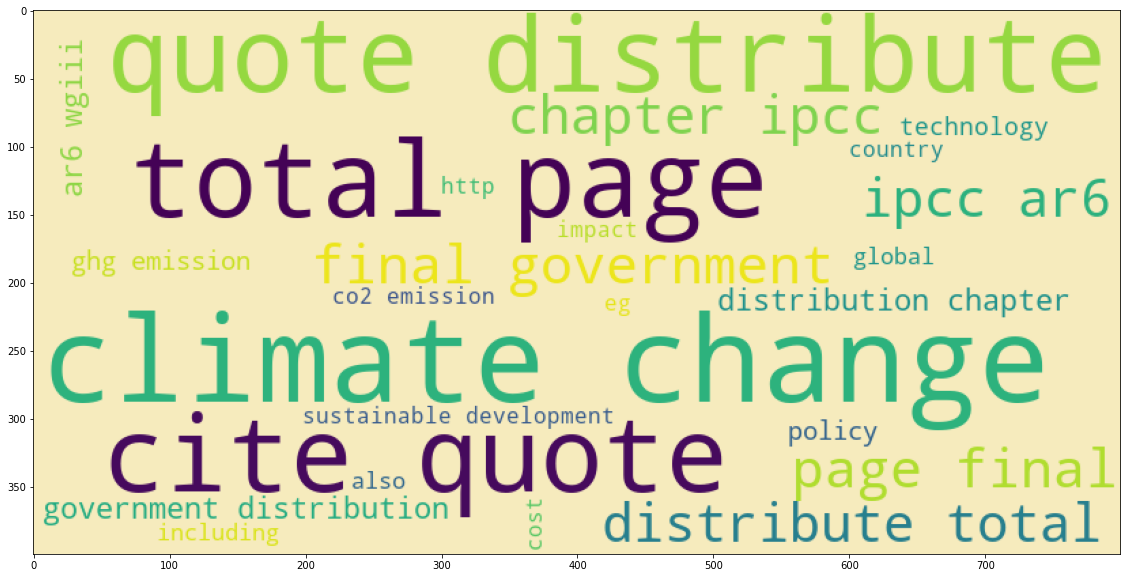

In [29]:
wordcloud = WordCloud(background_color=(246,235,189),max_words=25, width=800, height=400,random_state=30,stopwords=["et", "al"]).generate(' '.join(df['report'].tolist()))
plt.figure( figsize=(20,10))
plt.imshow(wordcloud); # basic cloud, removing "et al"

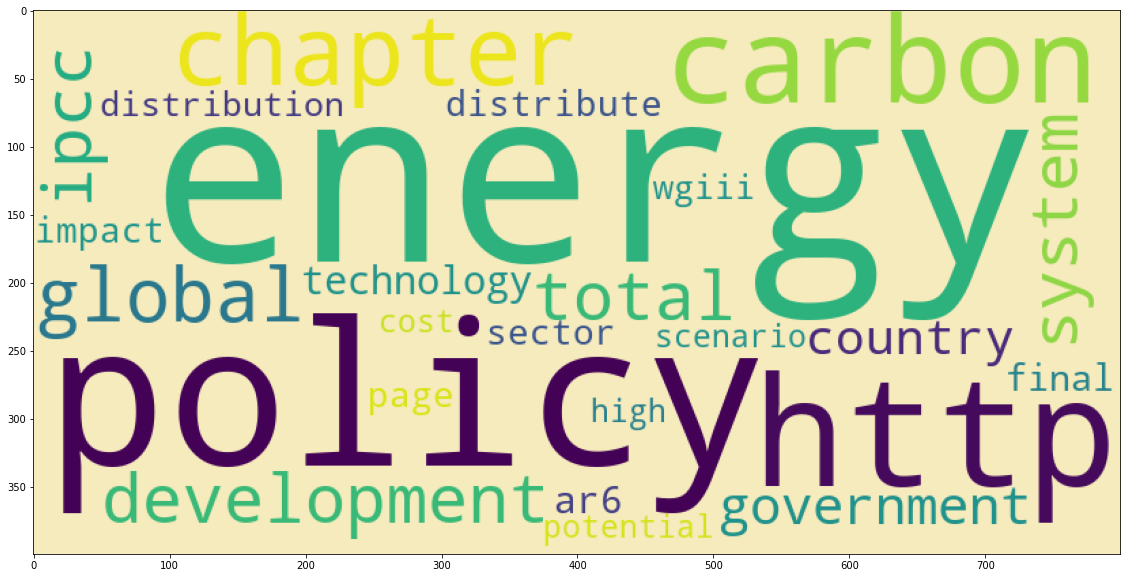

In [32]:
wordcloud = WordCloud(background_color=(246,235,189),max_words=25, width=800, height=400,random_state=30,stopwords=["climate", "change", "emission", "emissions", "cite", "quote", "et", "al", "mitigation"], collocations=False).generate(' '.join(df['report'].tolist()))
plt.figure( figsize=(20,10))
plt.imshow(wordcloud); # removing some of the more prominent terms

# can remove words with the stopwords function in first line. because it reads for bigrams, have to remove individual terms 

# add ",collocations=False" before generate function in first line to stop bigrams and focus on individual terms; must be in parentheses

# change max_words number to increase or limit terms

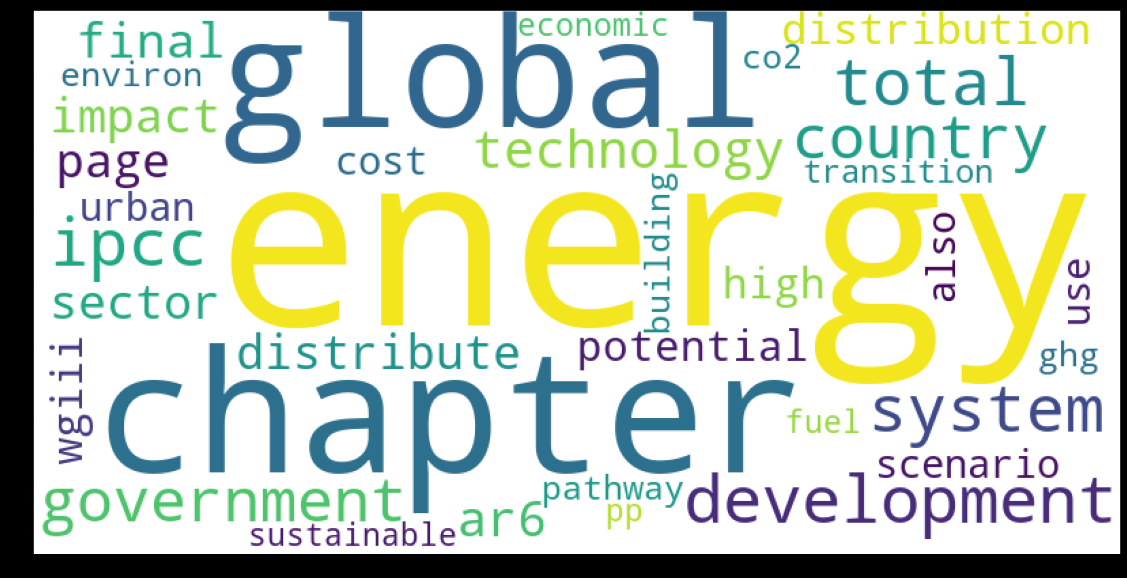

In [35]:
wordcloud_ab = WordCloud(background_color="white",max_words=35, width=800, height=400,stopwords=["mitigation", "climate", "change", "emission", "et", "al", "policy", "carbon", "http", "cite", "quote"], collocations=False).generate(' '.join(df['report'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud_ab); # removing bigrams and select stopwords

In [38]:
occurrences = MC10.count("mitigation")
print("Number of times the word \'mitigation\' appears:", occurrences)

Number of times the word 'mitigation' appears: 6343
